# Programa base para realização de experimentos

## Código Base

In [25]:
import numpy as np
from time import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

r = 600        # Número de repetições do experimento
R = range(r)    # Vetor das repetições

n = 10 ** 6     # Quantidade do dado
N = range(n)    # Vetor dos dados 'n'

Tc = []          # Resultado de cada experimento
Vc = []          #Vetor da variabilidade
Mc = []          #Vetor da media
Sc = []          #Vetor do Desvio padrao

Tv = []          # Resultado de cada experimento
Vv = []          #Vetor da variabilidade
Mv = []          #Vetor da media
Sv = []          #Vetor do Desvio padrao

x = 1

for j in R:

    tic = time()

#region Experimento 1
    for i in N:
        a = 1
#endregion
    tac = time()
    
    
    Tc.append(tac-tic)
    Sc.append(np.std(Tc))
    Mc.append(np.mean(Tc))
    Vc.append(np.std(Tc)/np.mean(Tc))
    
    tic = time()
    
#region Experimento 2
    for i in N:
        a = x
#endregion

    tac = time()
    
    Tv.append(tac-tic)
    Sv.append(np.std(Tv))
    Mv.append(np.mean(Tv))
    Vv.append(np.std(Tv)/np.mean(Tv))
    
    clear_output(wait=True)
    print(j/r)
    
print("Terminou!")

0.9983333333333333
Terminou!


## Gráficos

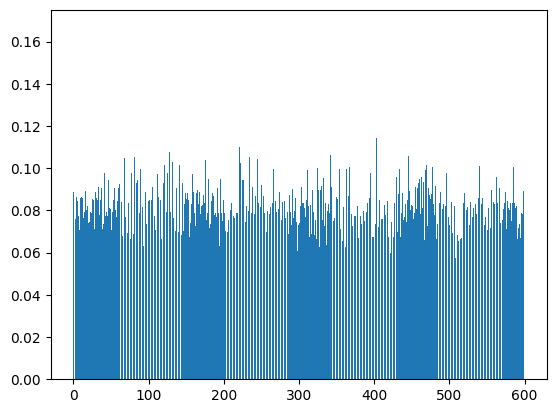

In [26]:
plt.bar(R,Tc)
plt.show()

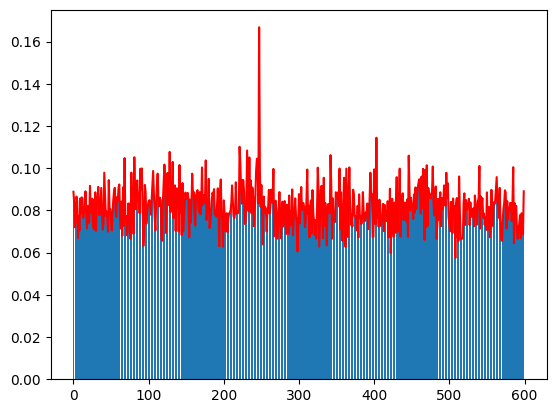

In [27]:
plt.plot(Tc, color='red')
plt.bar(R,Tc)
plt.show()

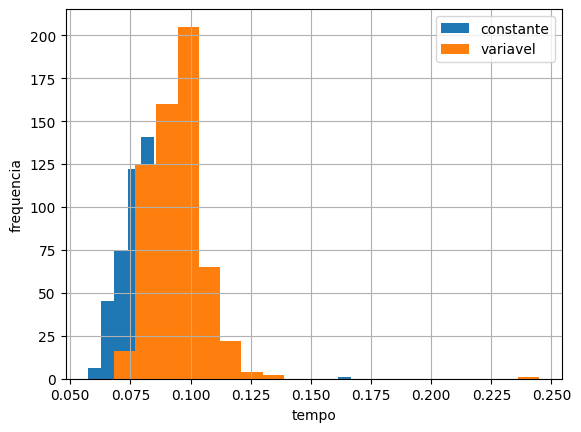

In [48]:
plt.hist(Tc, 20)
plt.hist(Tv, 20)

plt.legend(["constante","variavel"])

plt.xlabel('tempo')
plt.ylabel('frequencia')
plt.grid()
plt.show()
#Analise qualitativa dos dados, vendo se há uma distribuição normal dos dados

In [29]:
DevioPadrao = np.std(Tc)
Media = np.mean(Tc)
Variabilidade = DevioPadrao/Media

print(Variabilidade)
#Calculo da variabilidade para checar se a maquina é estavel para os experimentos. Idealmente precisa estar abaixo de .15

0.12154386556521013


### Teste da Variabilidade

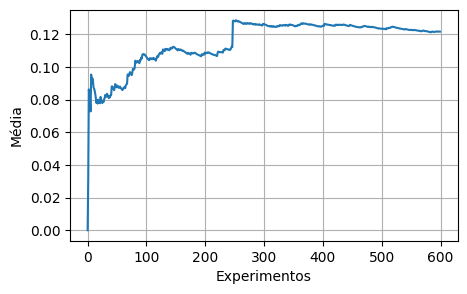

In [30]:
plt.figure(figsize=(5,3))
plt.plot(Vc)
plt.xlabel('Experimentos')
plt.ylabel('Média')
plt.grid()
plt.show()

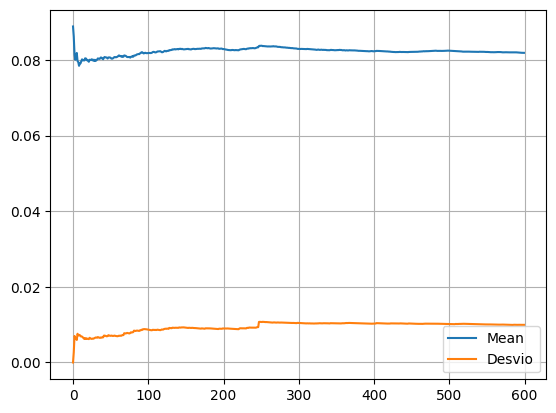

In [31]:
plt.plot(Mc)
plt.plot(Sc)
plt.grid()
plt.legend(["Mean", "Desvio"])
plt.show()

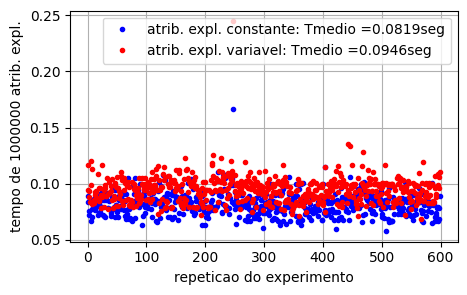

In [43]:
TC = np.mean(Tc)
TV = np.mean(Tv)

plt.figure(figsize=(5,3))
plt.plot(R, Tc, 'b.')
plt.plot(R, Tv, 'r.')

plt.legend(["atrib. expl. constante: Tmedio ={:.3g}".format(TC)+"seg",
           "atrib. expl. variavel: Tmedio ={:.3g}".format(TV)+"seg"])

plt.xlabel('repeticao do experimento')
plt.ylabel('tempo de '+str(n)+' atrib. expl.')
plt.grid()
plt.show()